# Characteristics of Defaulted Loans - Data Analysis on a Peer-to-Peer Lending Market
## by Hyoson Yamanaka

## Investigation Overview

- Prosper is a US-based peer-to-peer lending marketplace where borrowers can request personal loans from individual or institutional investors. 


- Using loan information from Propser covering the years from 2005 to 2014, we take a look at the borrower and loan characteristics with a focus on defaulted loans. Do loans in default show certain characteristics compared to performing loans?


- A loan is classified as default when the borrower has not made any of the required payments for 90+ days, i.e. the loan has been delinquent for at least 90 days.


## Dataset Overview

- The dataset in this report contains 113,937 loans from the Prosper marketplace. It provides borrower and loan characteristics with 81 variables.


- In this analysis the focus will be on employment status, income, loan origination date and state of the borrower.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Cleaning steps
df_clean = df.copy()
df_clean['LoanOriginationDate'] = pd.to_datetime(df_clean['LoanOriginationDate'], errors='coerce', yearfirst=True)
df_clean['DefaultFlag'] = df_clean['LoanCurrentDaysDelinquent'] >= 90

## Loan Origination

Prosper was founded in 2005 and its marketplace has been consistently used by investors to give out loans to individuals since then. 

In 2009 and 2010 we see a strong decline in originated loans, suggesting a significant impact of the financial crises at the time on borrower/creditor behavior. Since then the loan volume has picked up again and peaked in 2013 with almost 35,000 loans.

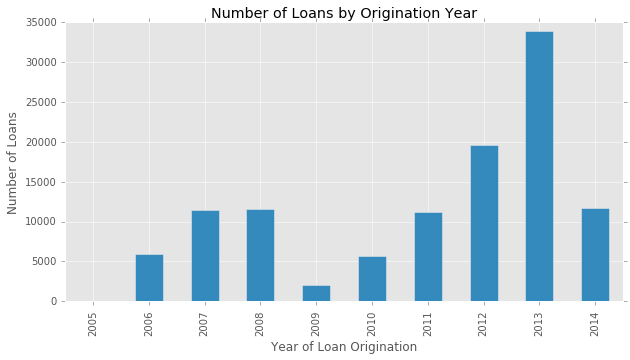

In [4]:
# Period coverage of data
coverage = df_clean.groupby(df_clean['LoanOriginationDate'].dt.year)['ListingNumber'].nunique()

# Bar chart
color = sb.color_palette()[1]

plt.figure(figsize=(10, 5))
coverage.plot(kind='bar', color=color);

plt.title('Number of Loans by Origination Year');
plt.xlabel('Year of Loan Origination');
plt.ylabel('Number of Loans');

## Default Rate

Default Rate = Number of defaulted Loans / Number of total loans originated


The default rate was highest for loans originated at the peak of the economy in 2006 and 2007, right before the financial crisis ensued. Almost 40% of loans originated in those years defaulted!

Since then the default rates have consistently decreased. This is not surprising given the steady recovery of the US economy in those years.

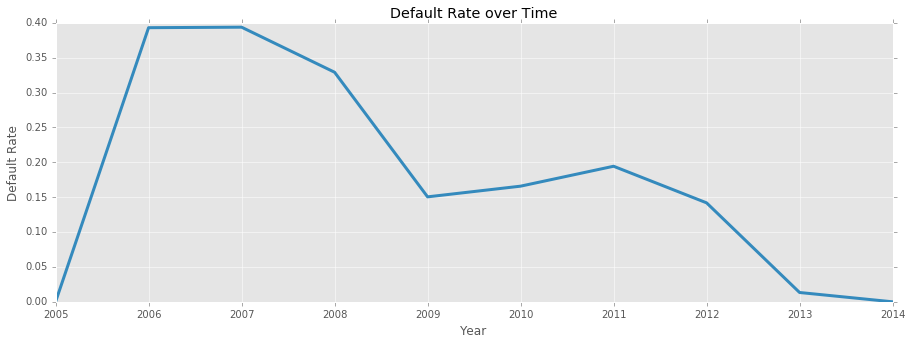

In [10]:
# Default rate by year
defaulted_loans = df_clean.groupby(df_clean['LoanOriginationDate'].dt.year)['DefaultFlag'].sum();
performing_loans = df_clean.groupby(df_clean['LoanOriginationDate'].dt.year)['ListingNumber'].count();

def_year = defaulted_loans / performing_loans;
def_year = def_year.reset_index();
def_year['LoanOriginationDate'] = def_year['LoanOriginationDate'].astype('str');

# Chart
def_year.plot.line(x = 'LoanOriginationDate', y = 0, color = color, lw=3, legend=False, figsize=(15,5));

plt.xlabel('Year');
plt.ylabel('Default Rate');
plt.title('Default Rate over Time');

## Default Rates across States

Not all regions seem to have performed euqally in terms of default rates. 

Several states, including WY and DC, have had overall default rates of under 10% from 2005 to 2014. Three states do stand out negatively though: ND, IA and ME. Each show default rates between 28% and 37%, significantly above the rest of the US.



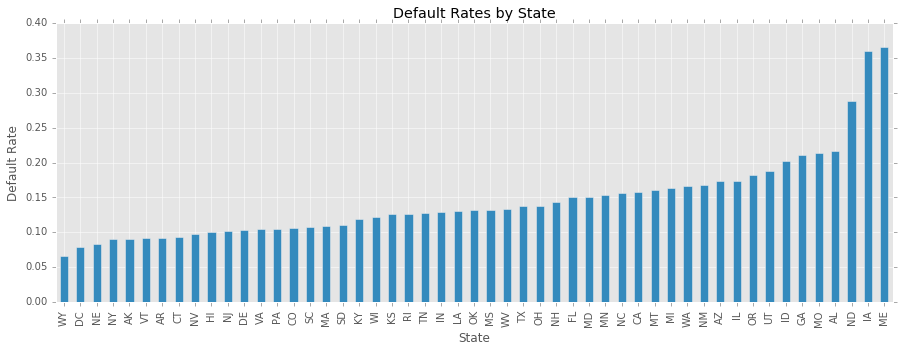

In [11]:
# Default rate by state
defaulted_loans = df_clean.groupby('BorrowerState')['DefaultFlag'].sum();
performing_loans = df_clean.groupby('BorrowerState')['ListingNumber'].count();

def_state = defaulted_loans / performing_loans
def_state.sort_values(inplace=True)

# Chart
plt.figure(figsize=(15, 5));
def_state.plot(kind = 'bar', color = color);

plt.xlabel('State');
plt.ylabel('Default Rate');
plt.title('Default Rates by State');

## Income and Employment Status

Borrowers who defaulted on their loans generally came from lower income sections of the population. This holds across almost all employment types. Only part-time workers show little difference in income levels between defaulted and performing loans.

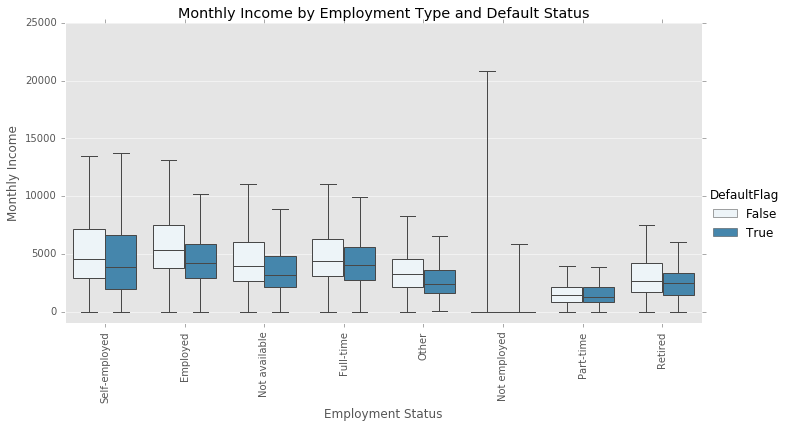

In [12]:
# Monthly income by employment type and defaults
sb.catplot(data = df_clean, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', 
           hue = 'DefaultFlag', kind="box", showfliers=False, height=5, aspect=2, color = color)

plt.ylim(-1000, 25000)
plt.xticks(rotation=90);
plt.title('Monthly Income by Employment Type and Default Status')
plt.xlabel('Employment Status')
plt.ylabel('Monthly Income');